Please follow the instructions carefully. Write all your code in a `Code` cell, and your explanations in a `Markdown` cell. Make sure that your code compiles correctly either by selecting a given cell and clicking the `Run` button, or by hitting `shift`+`enter` or `shift`+`return`.

### 1. Import `numpy`, `numpy.linalg`, `matplotlib.pyplot`, and `pandas`. Use the appropriate aliases when importing these modules.

In [1]:
# code for question 1
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### 2. Load the data from the file named `data_stock_returns.csv` into a `DatFrame` called `returns`. The file `data_stock_returns.csv` contains daily returns of a number of stocks selected from the S&P 500 universe. The rows of the csv file represent the returns over a number of days, and the columns represent individual stocks labeled by their NYSE ticker symbol, e.g., Apple stock is labeled `AAPL`.

In [2]:
# code for question 2
from google.colab import files
uploaded = files.upload()
returns = pd.read_csv('data_stock_returns.csv')

Saving data_stock_returns.csv to data_stock_returns.csv


### 3. View the `head` of the `returns` `DataFrame`

In [3]:
# code for question 3
returns.head()

,Date,ATVI,CHTR,CMCSA,CTL,DIS,DISCA,DISCK,DISH,EA,FB,GOOG,GOOGL,IPG,LYV,NFLX,NWS,NWSA,OMC,T,TMUS,TTWO,TWTR,VZ,AAP,AMZN,APTV,AZO,BBY,BKNG,BWA,CCL,CMG,DG,DHI,DLTR,DPZ,DRI,EBAY,EXPE,...,PEAK,PLD,PSA,REG,SBAC,SLG,SPG,UDR,VNO,VTR,WELL,WY,AEE,AEP,AES,ATO,AWK,CMS,CNP,D,DTE,DUK,ED,EIX,ES,ETR,EVRG,EXC,FE,LNT,NEE,NI,NRG,PEG,PNW,PPL,SO,SRE,WEC,XEL
0,2019-01-02,0.009829,0.010542,0.009354,0.018961,-0.006221,0.043115,0.031979,0.035795,0.018333,0.034415,0.009839,0.009259,-0.019085,-0.019271,0.000000,0.005181,0.003518,-0.007263,0.034439,0.025609,0.010341,0.002433,-0.003564,0.002917,0.024440,-0.006845,0.000167,0.012012,-0.000418,0.011164,0.011095,0.026443,-0.003429,0.017446,0.009696,-0.019093,0.000701,0.027409,-0.005965,...,-0.034605,-0.029203,-0.036988,-0.032386,-0.007067,-0.016576,-0.017898,-0.031537,-0.027291,-0.028917,-0.031019,-0.015211,-0.026407,-0.024378,-0.019554,-0.031443,-0.022280,-0.027360,-0.008181,-0.003926,-0.022092,-0.018714,-0.017415,-0.000352,-0.024120,-0.024344,-0.015801,-0.023103,-0.022352,-0.026380,-0.023222,-0.011107,-0.038352,-0.023718,-0.027728,-0.007796,-0.004564,-0.013306,-0.024556,-0.021542
1,2019-01-03,-0.036155,-0.001703,0.007825,0.004524,-0.024525,-0.005824,0.002515,0.020651,-0.020871,-0.029469,-0.028898,-0.028086,0.007874,-0.012917,0.013139,-0.013004,-0.009705,-0.015803,0.001353,-0.003684,-0.047853,-0.028875,0.003564,0.030741,-0.025566,-0.012010,0.008432,-0.020736,-0.034617,-0.030638,-0.051029,-0.008858,0.001206,-0.003977,-0.004836,-0.014949,-0.016243,-0.018542,-0.031386,...,0.035321,-0.008099,0.018992,0.001407,0.011074,-0.004123,-0.000849,0.004937,-0.002654,0.016725,0.018260,0.033344,0.002515,-0.002333,-0.000705,0.007540,0.003935,0.001861,0.005698,-0.004788,0.004162,-0.000354,0.002525,0.001585,-0.000630,0.002022,-0.003765,0.001134,-0.000273,0.001700,-0.002476,0.001196,-0.009491,-0.000197,0.010085,-0.003564,0.014082,0.004579,0.002660,-0.003948
2,2019-01-04,0.039127,0.051651,0.033218,0.027974,0.030381,0.017754,0.019072,0.068034,0.070034,0.046061,0.052390,0.050021,0.016047,0.047301,0.092793,0.042705,0.042523,0.024430,0.025369,0.037285,0.025393,0.067682,0.002487,-0.025121,0.048851,0.035764,-0.011837,0.004751,0.032204,0.036881,0.055033,0.034773,0.008587,0.045083,0.023197,0.016181,0.030846,0.022692,0.041249,...,0.000715,0.024964,-0.011128,0.003685,0.002458,0.024485,0.015110,-0.001557,0.016638,-0.004849,-0.003655,0.033572,0.014032,0.009165,0.032630,0.012732,0.007490,0.009255,0.018298,0.019155,0.015115,0.008233,0.016066,0.027418,0.010036,0.007457,0.003944,0.011269,0.012453,0.012057,0.018249,0.017378,0.033601,0.010764,0.012229,0.030242,0.008310,0.029491,0.007352,0.009738
3,2019-01-07,0.027806,-0.004204,-0.010668,0.021706,0.008630,0.014810,0.014271,0.011252,0.036862,0.000725,-0.002169,-0.001996,0.024304,0.017840,0.058002,0.019868,0.017685,0.005711,0.017965,0.013978,0.026298,0.045366,0.006367,0.014565,0.033776,0.015057,-0.016056,0.055493,-0.003342,0.025693,0.011719,0.064161,0.040291,0.017532,0.053143,0.011550,0.024741,0.017112,0.012915,...,0.011729,0.016077,-0.002801,0.009760,0.010075,0.028930,0.010460,0.002075,0.018934,0.005540,0.011793,0.019786,-0.011523,-0.005598,0.004770,-0.007334,-0.010637,-0.005131,0.003828,-0.009741,-0.003369,-0.004226,-0.014606,-0.018660,-0.002500,-0.004728,0.001073,0.001791,0.012566,-0.006975,-0.001450,0.005467,0.009179,0.002139,-0.001890,0.001384,-0.002239,-0.000181,-0.004552,-0.004339
4,2019-01-08,0.029859,-0.002524,0.008152,0.025441,0.007748,0.026410,0.020041,0.002793,0.016194,0.031937,0.007358,0.008745,0.030144,0.023494,0.015513,0.009788,0.014913,0.016671,0.012547,-0.009838,0.033065,0.014571,0.028846,-0.006975,0.016476,0.052700,-0.013405,0.028988,-0.014653,0.030947,0.024577,0.024876,0.004770,-0.004019,0.006512,-0.017273,0.016034,0.017825,0.020819,...,0.010895,0.032713,0.017795,0.020938,0.016092,0.039475,0.023605,0.022542,0.025951,0.009964,0.017504,0.005945,0.015695,0.012248,0.022850,0.012990,0.014527,0.014909,0.018924,0.011540,0.008810,0.012508,0.006079,0.005565,0.018136,0.017616,0.011727,0.015

### 4. View the `tail` of the `returns` `DataFrame`

In [4]:
# code for question 4
returns.tail()

,Date,ATVI,CHTR,CMCSA,CTL,DIS,DISCA,DISCK,DISH,EA,FB,GOOG,GOOGL,IPG,LYV,NFLX,NWS,NWSA,OMC,T,TMUS,TTWO,TWTR,VZ,AAP,AMZN,APTV,AZO,BBY,BKNG,BWA,CCL,CMG,DG,DHI,DLTR,DPZ,DRI,EBAY,EXPE,...,PEAK,PLD,PSA,REG,SBAC,SLG,SPG,UDR,VNO,VTR,WELL,WY,AEE,AEP,AES,ATO,AWK,CMS,CNP,D,DTE,DUK,ED,EIX,ES,ETR,EVRG,EXC,FE,LNT,NEE,NI,NRG,PEG,PNW,PPL,SO,SRE,WEC,XEL
247,2019-12-24,-0.001359,0.000291,0.009703,-0.002277,0.004207,0.003943,0.007496,0.001956,0.007026,-0.005154,-0.003922,-0.004601,-0.000434,0.002410,0.000300,-0.001399,-0.001430,0.001609,-0.002819,0.004667,0.014713,0.002156,-0.001956,0.003744,-0.002116,-0.006722,0.004472,0.003303,0.005839,-0.009526,-0.006262,0.000724,0.007000,0.007547,0.008510,0.004741,-0.001842,0.000000,0.007104,...,0.002391,0.002964,-0.001761,-0.001131,-0.001914,0.004920,0.005503,0.004134,0.002980,-0.001916,0.001001,-0.009668,0.001453,0.000960,-0.003032,-0.004782,0.001893,-0.000161,0.001122,-0.000860,-0.004671,0.000887,-0.001226,0.000134,0.002743,0.007311,0.006562,0.002651,0.001858,-0.000553,0.007219,-0.000729,-0.004752,-0.001537,-0.001350,-0.001122,-0.002057,0.000598,0.001529,0.003905
248,2019-12-26,0.001359,0.010077,0.009833,-0.003807,0.002818,0.007540,0.004212,0.008617,-0.000369,0.012933,0.012456,0.013329,0.005199,0.013085,-0.001712,0.016655,0.013499,0.000742,0.005120,0.001034,0.000484,0.003992,0.000163,-0.008129,0.043506,0.008709,-0.007070,-0.000910,0.009892,-0.001596,0.007627,0.011646,-0.006034,-0.003578,-0.012412,0.008936,0.003772,0.001104,0.002754,...,0.005952,0.006241,0.007122,0.002099,0.004612,0.013219,0.005814,0.003252,0.010361,0.004175,0.006858,0.004679,-0.001453,0.000426,0.008566,-0.000724,0.002135,0.000000,0.005590,0.001228,0.003038,0.001772,-0.000223,0.007058,0.004041,0.000669,-0.002651,0.000000,0.000619,-0.000922,0.006011,-0.002921,-0.016684,0.002049,0.001012,-0.002530,0.000633,0.006418,0.001418,-0.001114
249,2019-12-27,0.005081,-0.004209,0.002887,0.023371,0.000343,-0.004517,-0.005511,-0.004994,-0.000738,0.001491,-0.006275,-0.005763,-0.003463,0.001536,-0.010700,-0.004138,-0.001412,-0.000742,0.002041,-0.002069,0.003864,-0.002455,0.003908,-0.005793,0.000551,0.006145,-0.006738,-0.009608,0.003974,-0.001142,0.000000,-0.002161,0.008591,-0.001888,0.008220,0.000240,-0.008298,-0.004978,-0.006900,...,0.008569,0.002936,0.001324,0.007392,0.000622,-0.004856,0.006594,0.003026,-0.030197,0.003812,0.005946,-0.000333,0.008688,0.003297,0.002506,-0.003354,0.008822,0.004166,0.000000,0.006607,0.002564,0.006396,0.003230,-0.001727,0.000237,0.002841,0.000312,0.001984,-0.002477,0.002211,0.002271,-0.002196,0.000000,-0.000853,-0.001125,-0.000281,0.004580,0.001446,0.006085,0.005242
250,2019-12-30,-0.005251,-0.001262,0.001772,-0.024134,-0.013678,-0.011231,-0.008161,-0.015700,-0.013930,-0.017891,-0.011719,-0.011083,0.000867,-0.006160,-0.017720,-0.000691,-0.005670,0.000866,-0.005110,0.010817,-0.017179,-0.016104,-0.005214,0.004851,-0.012328,-0.011067,-0.016213,0.006415,-0.009049,-0.008261,-0.006058,-0.000861,0.004459,-0.006827,0.006977,0.003211,0.008757,-0.007514,-0.005091,...,0.002057,0.002140,-0.002034,-0.000961,-0.012169,-0.002816,0.000000,-0.000216,-0.003801,0.002590,0.000617,-0.001669,0.003402,-0.001700,0.002998,0.003083,0.000732,0.000799,0.000000,0.000975,0.001086,-0.001981,0.002776,0.001715,0.001067,-0.004851,0.002494,-0.000661,0.002064,0.000736,-0.005043,0.008393,0.000000,0.001535,0.004492,0.004214,-0.001893,0.001192,-0.001518,0.002690
251,2019-12-31,0.009129,0.004132,-0.004659,0.008362,0.005964,-0.000611,-0.000656,0.002258,0.005409,0.004101,0.000658,-0.000239,0.000866,0.003645,0.000804,0.003452,0.004963,0.001359,0.001024,0.004345,0.000654,0.000624,0.003099,0.006515,0.000514,-0.002944,0.006789,0.002623,-0.000068,-0.000461,-0.003731,0.001243,-0.008745,0.003799,0.005972,0.001806,0.000459,0.008622,0.003427,...,0.011966,0.003146,0.008251,0.010997,0.010428,0.006278,0.009240,0.007954,0.013017,0.009624,0.009460,0.008981,0.003130,0.005092,-0.007010,0.012504,-0.001627,0.003986,0.013289,0.008975,0.006566,0.004615,0.003100,0.009326,0.007789,0.00435

### 5. How many stocks are in this `DataFrame`?

In [5]:
# code for question 5
a = returns.columns[1:] #every column except the first one (dates)
print(len(a))

488


**ANSWER FOR QUESTION 5**: double click on this cell to write your answer
<br>
488 stocks are in this DataFrame

### 6. Over how many days are these stock returns reported?

In [6]:
# code for question 6
returns.describe()

,ATVI,CHTR,CMCSA,CTL,DIS,DISCA,DISCK,DISH,EA,FB,GOOG,GOOGL,IPG,LYV,NFLX,NWS,NWSA,OMC,T,TMUS,TTWO,TWTR,VZ,AAP,AMZN,APTV,AZO,BBY,BKNG,BWA,CCL,CMG,DG,DHI,DLTR,DPZ,DRI,EBAY,EXPE,F,...,PEAK,PLD,PSA,REG,SBAC,SLG,SPG,UDR,VNO,VTR,WELL,WY,AEE,AEP,AES,ATO,AWK,CMS,CNP,D,DTE,DUK,ED,EIX,ES,ETR,EVRG,EXC,FE,LNT,NEE,NI,NRG,PEG,PNW,PPL,SO,SRE,WEC,XEL
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,...,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,0.000999,0.002111,0.001163,-0.000213,0.001147,0.001112,0.001105,0.001393,0.001227,0.001779,0.001014,0.000985,0.000622,0.001478,0.000753,0.000962,0.000930,0.000533,0.001489,0.000831,0.000688,0.000433,0.000514,0.000074,0.000822,0.001762,0.001394,0.002117,0.000698,0.000953,0.000282,0.002627,0.001494,0.001721,0.000161,0.000711,0.000460,0.001059,-0.000117,0.001030,...,0.001015,0.001761,0.000341,0.000429,0.001590,0.000755,-0.000277,0.000772,0.000276,0.000134,0.000823,0.001490,0.000750,0.001057,0.001396,0.000826,0.001272,0.001042,0.000024,0.000773,0.000769,0.000389,0.000807,0.001267,0.001176,0.001456,0.000670,0.000166,0.001165,0.001144,0.001411,0.000372,0.000027,0.000626,0.000344,0.001144,0.001652,0.001447,0.001251,0.001113
std,0.022543,0.013527,0.011997,0.024812,0.013978,0.018963,0.017776,0.021035,0.023247,0.017455,0.015148,0.014897,0.013911,0.016621,0.021821,0.013690,0.014159,0.011883,0.011409,0.012949,0.021295,0.026866,0.009997,0.016765,0.014431,0.019553,0.013002,0.021191,0.015996,0.019641,0.017639,0.016805,0.013212,0.016408,0.018134,0.018132,0.013031,0.014488,0.023883,0.017207,...,0.012438,0.011362,0.010363,0.010230,0.012976,0.011700,0.011373,0.009489,0.010514,0.013224,0.011420,0.013872,0.008977,0.008576,0.012564,0.008846,0.009305,0.009074,0.011815,0.009026,0.008348,0.007982,0.008293,0.016774,0.008222,0.008844,0.008827,0.009881,0.009147,0.008673,0.009075,0.010326,0.013595,0.008413,0.009601,0.010237,0.008803,0.009216,0.008992,0.008995
min,-0.106662,-0.024105,-0.034845,-0.139966,-0.050674,-0.073952,-0.069254,-0.091009,-0.142777,-0.078021,-0.080089,-0.077982,-0.057981,-0.076138,-0.108388,-0.054546,-0.055487,-0.051051,-0.044289,-0.043716,-0.148003,-0.233303,-0.044620,-0.078080,-0.055321,-0.069805,-0.045135,-0.114212,-0.116121,-0.053766,-0.091241,-0.063512,-0.077863,-0.048737,-0.165365,-0.095953,-0.064636,-0.095769,-0.320016,-0.077464,...,-0.035560,-0.056252,-0.049971,-0.036649,-0.044259,-0.040567,-0.041048,-0.032070,-0.030197,-0.093518,-0.036227,-0.037235,-0.026407,-0.024378,-0.038731,-0.036323,-0.028700,-0.027360,-0.051125,-0.028926,-0.023013,-0.028819,-0.024186,-0.088889,-0.024880,-0.024344,-0.075973,-0.046763,-0.040984,-0.026380,-0.034307,-0.055358,-0.044711,-0.024233,-0.037437,-0.024161,-0.025545,-0.028013,-0.028978,-0.025574
25%,-0.010714,-0.004273,-0.005694,-0.012640,-0.006000,-0.007867,-0.008144,-0.009332,-0.009976,-0.006957,-0.006170,-0.005856,-0.006521,-0.006219,-0.011408,-0.006138,-0.006340,-0.005340,-0.003933,-0.007279,-0.008677,-0.011105,-0.004713,-0.008907,-0.006613,-0.007947,-0.005946,-0.007778,-0.007465,-0.009560,-0.008481,-0.005693,-0.004156,-0.008569,-0.007432,-0.009480,-0.007161,-0.006426,-0.006035,-0.006937,...,-0.004865,-0.004923,-0.004899,-0.004822,-0.004548,-0.006940,-0.006329,-0.002904,-0.006902,-0.00683

**ANSWER FOR QUESTION 6**: double click on this cell to write your answer
<br>
These stocks are reported for 252 days.

### 7. Extract the returns of the Amazon stock only, which has a ticker symbol `AMZN`. Save it in a `Series` called `amzn_returns`.

In [7]:
# code for question 7
amzn_returns = returns['AMZN']
amzn_returns

0      0.024440
1     -0.025566
2      0.048851
3      0.033776
4      0.016476
         ...   
247   -0.002116
248    0.043506
249    0.000551
250   -0.012328
251    0.000514
Name: AMZN, Length: 252, dtype: float64

### 8. Plot the Amazon stock returns extracted in the above cell. 

Text(0, 0.5, 'Stock Returns')

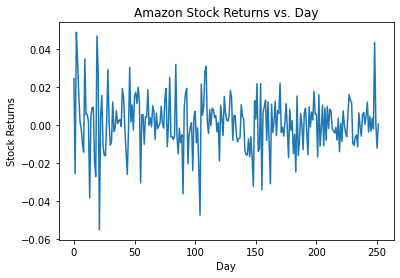

In [8]:
# code for question 8
plt.plot(amzn_returns)
plt.title("Amazon Stock Returns vs. Day")
plt.xlabel("Day")
plt.ylabel("Stock Returns")

### 9. Plot the cumulative sum of the Amazon stock returns using the method `.cumsum()` which acts directly on the `amzn_returns` `Series`.

Text(0, 0.5, 'Cumulative returns')

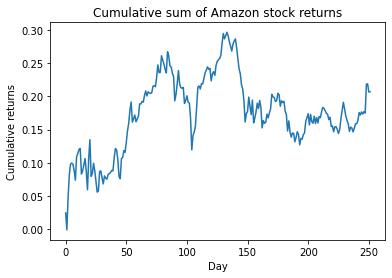

In [9]:
# code for question 9
plt.plot(amzn_returns.cumsum())
plt.title("Cumulative sum of Amazon stock returns")
plt.xlabel("Day")
plt.ylabel("Cumulative returns")

In [10]:
# the module below will allow us to perform linear regression
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The function `lin_reg(x,y)` given below performs ordinary least squares (OLS) linear regression using `sm.OLS` from the `statsmodels.api` module.

The code enclosed in `''' '''` is the docstring of the function `lin_reg`.

`x` in the `lin_reg` function is a matrix that contains the regressors, and `y` represents the vector containing the dependent variable. Note that `x` might contain one vector or multiple vectors. In the case that `x` contains one vector $x$, the regression gives:

$$ y = \beta_0 + \beta_1 x $$

In the case that `x` contains multiple vectors $x_1, \dots, x_k$, the regression becomes:

$$ y = \beta_0 + \beta_1 x_1 + \dots + \beta_k x_k$$

The $\beta$'s are the regression coefficients obtained using least squares. Note that `sm.add_constant` is used in the function below to make `x` look like the matrix $A$ we use in least squares, whose first column contains all ones.

In [11]:
def lin_reg(x, y):
    '''
    ordinary linear regression using least-squares
    
    Parameters
    ----------  
    x: regressors (numpy array)
    y: dependent variable (numpy array)
    
    Returns
    -------
    coefficients: regression coefficients (pandas Series)
    residuals: regression residuals (numpy array)
    r_squared: correlation coefficient (float)
    
    '''
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    coefficients = model.params
    residuals = model.resid
    r_squared = model.rsquared
    return coefficients, residuals, r_squared

### 10. Let's try to use the above function. Extract (as numpy array) the stock returns of:

- Apple (ticker symbol `AAPL`) and call it `aapl`
- Intel (ticker symbol `INTC`) and call it `intc`
- Microsoft (ticker symbol `MSFT`) and call it `msft`
- IBM (ticker symbol `IBM`) and call it `ibm`

### Let `y` be the Apple stock returns, and `x` be the Intel stock returns. Use the `lin_reg` function defined above to find $y=\beta_0 + \beta_1 x$. 

In [12]:
# code for question 10
aapl = returns['AAPL']
intc = returns['INTC']
msft = returns['MSFT']
ibm = returns['IBM']
print(lin_reg(intc, aapl))

(const    0.001956
INTC     0.535263
dtype: float64, 0     -0.002524
1     -0.076593
2      0.007970
3     -0.006672
4      0.013553
         ...   
247   -0.002630
248    0.014009
249   -0.004657
250    0.008075
251    0.003263
Length: 252, dtype: float64, 0.3050299157977575)


Answer: So the least squares model is $y = 0.001956 + 0.535263x$, where x are the Intel stock returns and y are the predicted Apple stock returns. 

### 11. Plot the cumulative sum of the Apple returns prediction from least squares on top of the actual Apple returns. How well do the Intel stock returns describe the Apple stock returns?

Text(0, 0.5, 'Cumulative returns')

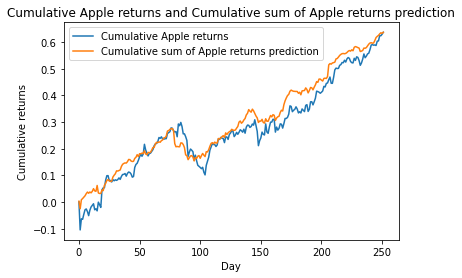

In [13]:
# code for question 11
plt.plot(aapl.cumsum())
x = np.arange(0,252,1)
y = 0.001956 + 0.535263*intc
plt.plot(x, y.cumsum())
plt.title("Cumulative Apple returns and Cumulative sum of Apple returns prediction")
plt.legend(['Cumulative Apple returns', 'Cumulative sum of Apple returns prediction'])
plt.xlabel("Day")
plt.ylabel("Cumulative returns")

Answer to: How well do the Intel stock returns describe the Apple stock returns?
<br>
The Intel stock returns describe the Apple stock returns moderately well. The R-squared value of 0.305 is low, so the two variables are not perfectly correlated. However, the prediction still captures peaks and dips in the Apple stock. Most notably, the prediction and the actual returns both seem to peak between Day 60 and 80, and then they both dip between Day 80 and Day 110 (rough estimates based on what I can see). 

### 12. Now, let `y` be the Apple stock returns, and `x` be the Intel, Microsoft, and IBM stock returns. Use the `lin_reg` function defined above to find $y=\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3$, where $x_1$ represents Intel returns, $x_2$ represents Microsoft returns, and $x_3$ represents IBM returns. 

In [14]:
# code for question 12
X = pd.DataFrame({'INTC': intc,
                   'MSFT': msft,
                   'IBM': ibm,
                    })
print(lin_reg(X, aapl))

(const    0.001116
INTC     0.284141
MSFT     0.543723
IBM      0.150586
dtype: float64, 0     -0.000494
1     -0.066546
2     -0.006721
3     -0.006419
4      0.009922
         ...   
247   -0.000290
248    0.012216
249   -0.004122
250    0.014456
251    0.003302
Length: 252, dtype: float64, 0.47047307056763)


Answer: The least squares model is $y=0.001116 + 0.284141 x_1+ 0.543723 x_2 + 0.150586 x_3$, where $x_1$ represents Intel's stock returns, $x_2$ represents Microsoft's returns, $x_3$ represents IBM's returns, and $y$ represents Apple's predicted returns.  

---



### 13. Plot the cumulative sum of the Apple returns prediction from least squares on top of the cumulative sum of actual Apple returns. How well do the Intel, Microsoft, and IBM stock returns describe the Apple stock returns?

Text(0, 0.5, 'Cumulative returns')

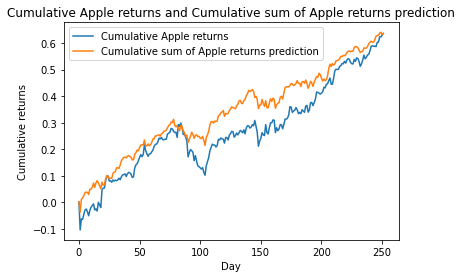

In [15]:
# code for question 13
plt.plot(aapl.cumsum())
x = np.arange(0,252,1)
y = 0.001116 + 0.284141*intc + 0.543723*msft + 0.150586*ibm
plt.plot(x, y.cumsum())
plt.title("Cumulative Apple returns and Cumulative sum of Apple returns prediction")
plt.legend(['Cumulative Apple returns', 'Cumulative sum of Apple returns prediction'])
plt.xlabel("Day")
plt.ylabel("Cumulative returns")

Answer to: How well do the Intel, Microsoft, and IBM stock returns describe the Apple stock returns?
<br>
The Intel, Microsoft, and IBM stock returns together describe the Apple stock returns very well. This model has an R-squared of 0.47, which is much higher than the previous model's R-squared. However the model still fails to capture all the changes in the Apple stock, and it tends to overestimate. Maybe if we added even more companies, the model would be even better.

The file `SPY.csv` contains the prices of SPDR S&P 500 ETF Trust. This Exchange Traded Fund (ETF) contains a collection of assets currently present in the S&P 500 index. 

### 14. Load `SPY.csv` into a DataFrame called `spy_prices` using the `read_csv` method in `pandas`. Make sure to make the 'Date' column to be your index column. To do that, read the docstring for `read_csv`. 

In [16]:
# code for question 14
from google.colab import files
uploaded = files.upload()
spy_prices = pd.read_csv('SPY.csv', index_col = 'Date')

Saving SPY.csv to SPY.csv


### 15. Once you have downloaded the file into the `DataFrame`, observe all the available prices and dates. Show the head of the `DataFrame`, and then answer the following questions:

(a) Which prices are reported?

(b) From which date to which date are these prices reported?

In [17]:
# code for question 15
display(spy_prices.head())
display(spy_prices.tail())

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,206.880005,204.179993,206.380005,205.429993,121465900.0,184.260223
2015-01-05,204.369995,201.350006,204.169998,201.720001,169632600.0,180.932541
2015-01-06,202.720001,198.860001,202.089996,199.820007,209151400.0,179.228363
2015-01-07,202.720001,200.880005,201.419998,202.309998,125346700.0,181.461731
2015-01-08,206.160004,203.990005,204.009995,205.899994,147217800.0,184.681763


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-26,302.190002,295.459991,301.929993,299.079987,88951400.0,297.769623
2020-05-27,303.570007,296.869995,302.119995,303.529999,104817400.0,302.200134
2020-05-28,306.839996,302.239990,304.649994,302.970001,90405200.0,301.642609
2020-05-29,304.959991,299.470001,302.459991,304.320007,119265700.0,302.986694
2020-06-01,306.209991,303.059998,303.619995,305.549988,55758300.0,304.211273


**ANSWER FOR QUESTION 15**: double click on this cell to write your answer
<br>
a) The prices reported are: the high price, low price, opening price, closing price, and adjusted closing price. It also displays the volume of trades.
<br>
b) The dates reported start on 1/2/2015 and end on 6/1/2020

### 16. Retain only the Adjusted Close price in the `spy_prices` `DataFrame`. Call the resulting `Series` `spy_adjclose`.

In [18]:
# code for question 16
spy_adjclose = spy_prices['Adj Close']
spy_adjclose

Date
2015-01-02    184.260223
2015-01-05    180.932541
2015-01-06    179.228363
2015-01-07    181.461731
2015-01-08    184.681763
                 ...    
2020-05-26    297.769623
2020-05-27    302.200134
2020-05-28    301.642609
2020-05-29    302.986694
2020-06-01    304.211273
Name: Adj Close, Length: 1362, dtype: float64

### 17. Now, using the `pct_change` method in `pandas`, compute the returns on the Adjusted Close prices of SPY, and only retain the returns from '2019-01-01' to '2020-01-01'. Call the `Series` obtained `spy_returns`.

In [19]:
# code for question 17
spy_returns = spy_adjclose.pct_change().loc['2019-01-01':'2020-01-01']
spy_returns

Date
2019-01-02    0.001040
2019-01-03   -0.023863
2019-01-04    0.033496
2019-01-07    0.007885
2019-01-08    0.009395
                ...   
2019-12-24    0.000031
2019-12-26    0.005323
2019-12-27   -0.000248
2019-12-30   -0.005513
2019-12-31    0.002429
Name: Adj Close, Length: 252, dtype: float64

### 18. Perform SVD on `returns` data that contain assets from the S&P 500. Retain the left singular vector corresponding to the largest singular value and call is `u_sigma1`.

In [20]:
# code for question 18
returns_without_date = returns.loc[:,'ATVI':]
U, Sigma, V = la.svd(returns_without_date)
u_sigma1 = U[:, 0]
u_sigma1

array([-2.61377831e-02,  1.61545283e-01, -2.39072521e-01, -8.50919141e-02,
       -6.50519613e-02, -6.54989459e-02, -3.42081872e-02, -9.61532142e-03,
        2.61106863e-02, -3.66516290e-02, -2.17256697e-02, -6.56591169e-02,
       -1.13175003e-01,  1.12292114e-01,  1.46262775e-02, -5.27029066e-02,
       -9.20756297e-02,  4.15309183e-02, -4.19965671e-03, -8.25840670e-02,
       -3.85878070e-02, -2.64600711e-02, -3.59552764e-02, -2.74447318e-02,
       -2.07249932e-03,  6.85491747e-02, -4.53474533e-03, -2.22774569e-02,
       -9.29941909e-02, -3.39398663e-02,  1.32384003e-02, -7.90552361e-02,
       -1.16513989e-02, -2.66305482e-02,  3.52424919e-02, -4.31805646e-02,
       -1.29146535e-02,  2.38675368e-02,  7.12326108e-04,  2.57816012e-02,
       -5.33638427e-02,  3.78084001e-02,  2.71099796e-02,  6.88500556e-02,
        6.13648127e-02,  2.61571787e-02, -9.29108228e-02, -1.72259542e-02,
       -4.15159401e-02,  1.01911602e-02, -2.50269848e-02, -4.07107612e-02,
        4.63895693e-03,  

### 19. `u_sigma1` is thought to track the market. To test that, we will perform a regression of `spy_returns` against this first left singular vector by letting `y=spy_returns` and `x=u_sigma1` and computing

### $$ y = \beta_0 + \beta_1 x$$
### using least squares regression.

In [21]:
# code for question 19
x=u_sigma1
y=spy_returns
lin_reg(x, y)

(const    0.000346
 x1      -0.118992
 dtype: float64, Date
 2019-01-02   -0.002416
 2019-01-03   -0.004987
 2019-01-04    0.004702
 2019-01-07   -0.002587
 2019-01-08    0.001308
                 ...   
 2019-12-24   -0.000267
 2019-12-26    0.003130
 2019-12-27    0.001098
 2019-12-30   -0.002383
 2019-12-31   -0.000872
 Length: 252, dtype: float64, 0.8987899218671402)

$y = 0.000346 - 0.118992 x$

### 20. Plot the cumulative sum of the result from the regression on top of the cumulative sum of `spy_returns`. What do you notice?

Text(0, 0.5, 'Cumulative returns')

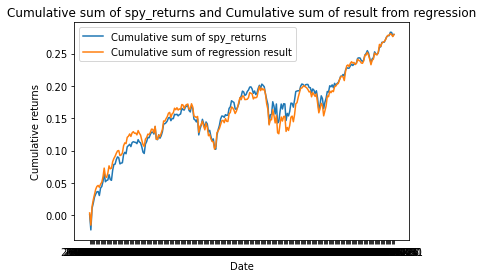

In [22]:
# code for question 20
plt.plot(spy_returns.cumsum())
Y = 0.000346-0.118992*x
plt.plot(Y.cumsum())
plt.title("Cumulative sum of spy_returns and Cumulative sum of result from regression")
plt.legend(['Cumulative sum of spy_returns', 'Cumulative sum of regression result'])
plt.xlabel("Date")
plt.ylabel("Cumulative returns")

**ANSWER FOR QUESTION 20**: double click on this cell to write your answer
<br>
The result from the regression is a very good predictor of spy_returns. The R-squared is .90, which is much higher than any other model we made in this project. Even though we only used one left singular vector, the model is still very accurate.

Congratulations! You have just implemented your first statistical 
Capital Asset Pricing Model (CAPM) to the S&P 500 market.